In [19]:
from qiskit import * ### Importing the library to our notebook
from qiskit_aer import AerSimulator
from qiskit_aer import AerProvider
from qiskit.visualization import plot_histogram
%matplotlib inline

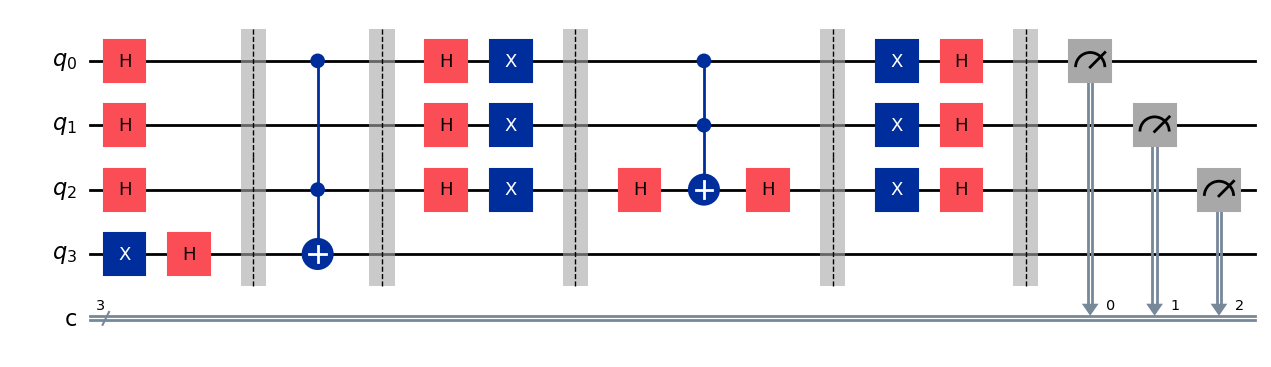

In [20]:
### Grover's search algorithm on Boolean function f(x_1,x_2,x_3)=x_1x_2x_3
n=3 ### Number of variables
q = QuantumRegister(n+1, 'q')
c = ClassicalRegister(n, 'c')
qc_grov = QuantumCircuit(q,c)
### Initialization
for i in range(0,n):
 qc_grov.h(q[i])
qc_grov.x(q[3])
qc_grov.h(q[3])
qc_grov.barrier()
### Quantum oracle: f(x1,x2,x3) = x1x3, output 1 only when x1x3=11
qc_grov.ccx(q[0],q[2],q[3])
qc_grov.barrier()
for i in range(0,n):
 qc_grov.h(q[i])
### Phase-oracle starts ###
for i in range(0,n):
 qc_grov.x(q[i])
qc_grov.barrier()
qc_grov.h(q[2])
qc_grov.ccx(q[0],q[1],q[2])
qc_grov.h(q[2])
qc_grov.barrier()
for i in range(0,n):
 qc_grov.x(q[i])
### phase-oracle ends ###
for i in range(0,n):
 qc_grov.h(q[i])
qc_grov.barrier()
### Measurement
for i in range(0,n):
 qc_grov.measure(q[i],c[i])

qc_grov.draw(output='mpl')

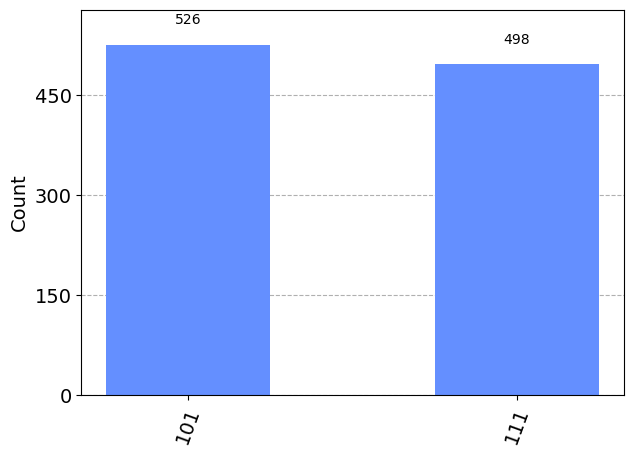

In [21]:
prov = AerProvider()
simulator = prov.get_backend('qasm_simulator')
result = simulator.run(qc_grov).result()
plot_histogram(result.get_counts(qc_grov))